**BREAST CANCER PREDICTiON**

**Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.model_selection import cross_validate


**Modelling**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

**Evaluation and comparision** 

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score,f1_score

**Loading the dataset**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/guvi/cancer.csv')


In [ ]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
df.shape

(569, 33)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

**dataset desription**

In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


**checking of missing values**

In [ ]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
df = df.drop(['Unnamed: 32','id'],axis=1)

checking for the correlation

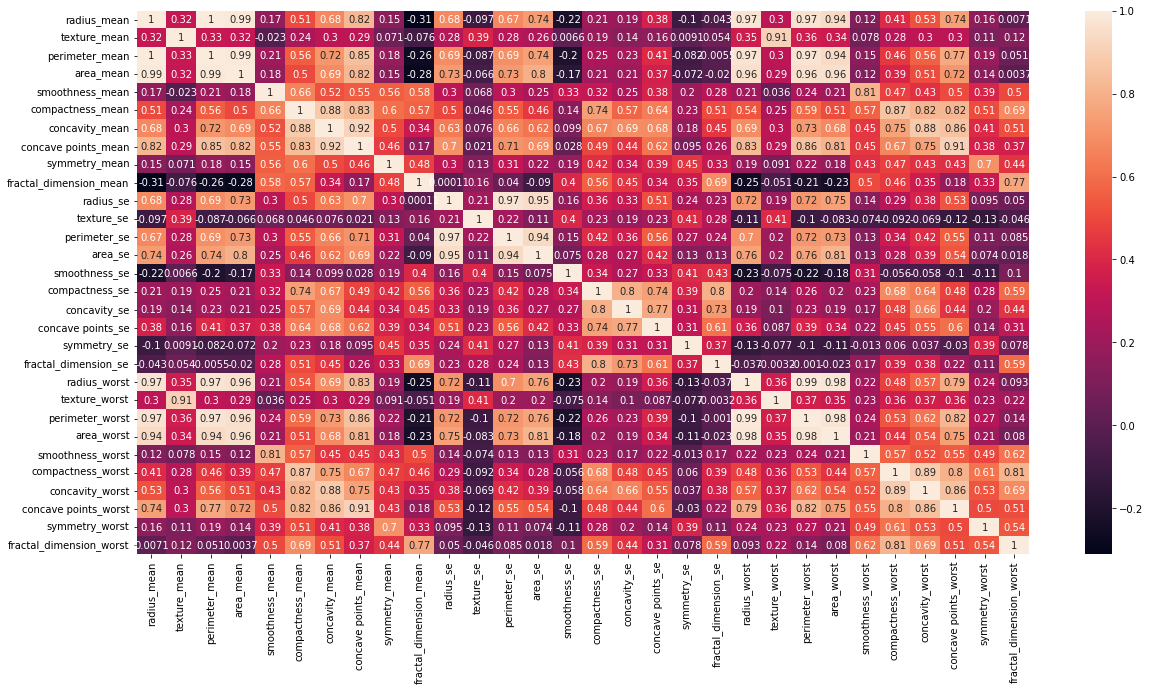

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()


**correlating pairs**

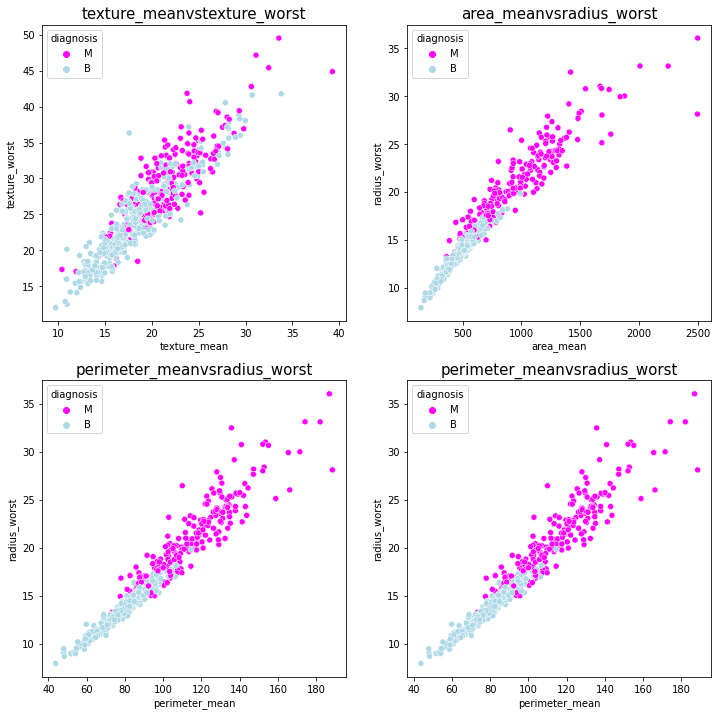

In [ ]:
palette={'B' :'lightblue','M':'magenta'}

fig =plt.figure(figsize=(12,12))
def plot_scatter(a,b,k):
    plt.subplot(k)
    sns.scatterplot(x = df[a], y = df[b], hue = "diagnosis",data = df, palette = palette)
    plt.title(a +'vs'+ b, fontsize=15 )


plot_scatter('texture_mean','texture_worst',221)
plot_scatter('area_mean','radius_worst',222)
plot_scatter('perimeter_mean','radius_worst',223)
plot_scatter('perimeter_mean','radius_worst',224)

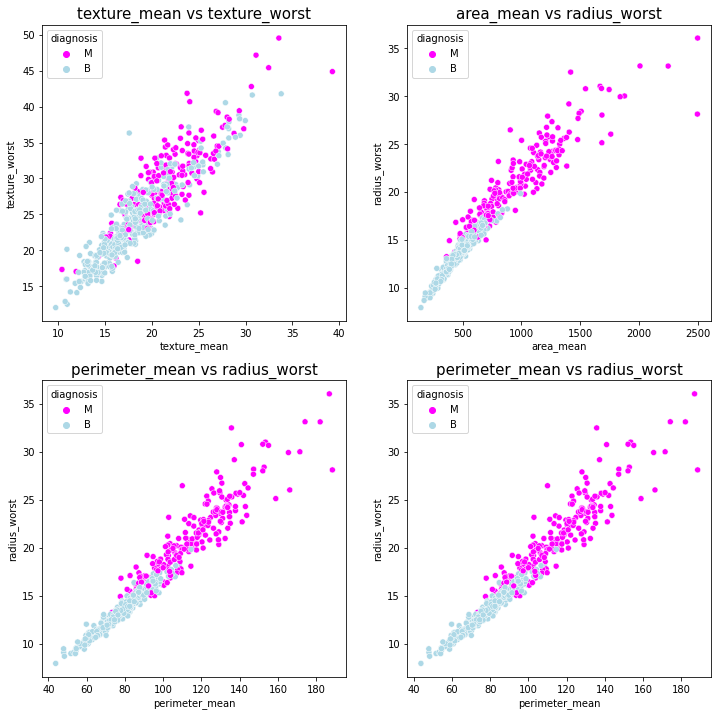

In [ ]:
palette ={'B': 'lightblue','M': 'magenta'}

fig = plt.figure(figsize=(12,12))
def plot_scatter(a,b,k):
    plt.subplot(k)
    sns.scatterplot(x = df[a], y = df[b], hue = "diagnosis", data = df, palette = palette)
    plt.title(a +' vs ' + b,fontsize=15)

plot_scatter('texture_mean','texture_worst',221)
plot_scatter('area_mean','radius_worst',222)
plot_scatter('perimeter_mean','radius_worst',223)
plot_scatter('perimeter_mean','radius_worst',224)


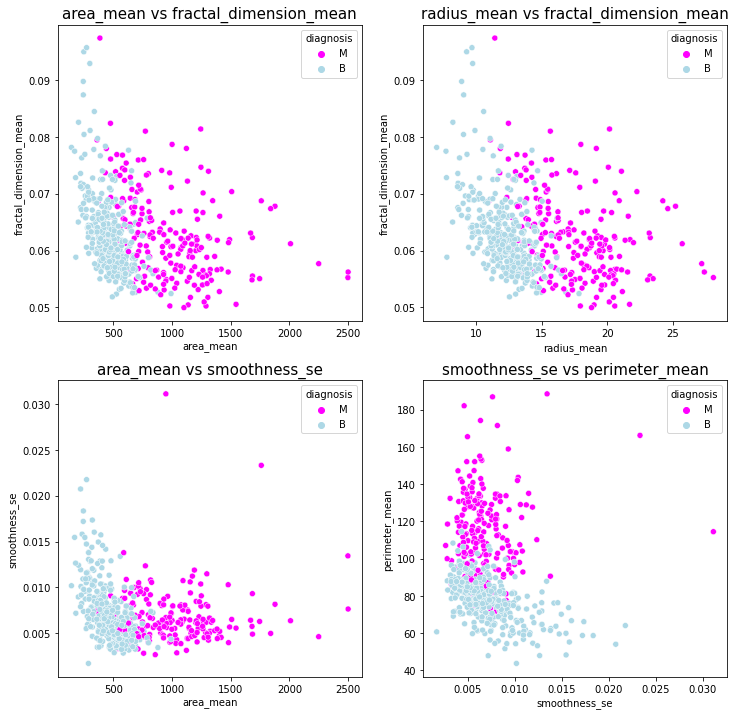

In [ ]:
fig = plt.figure(figsize=(12,12))
plot_scatter('area_mean','fractal_dimension_mean',221)
plot_scatter('radius_mean','fractal_dimension_mean',222)
plot_scatter('area_mean','smoothness_se',223)
plot_scatter('smoothness_se','perimeter_mean',224)

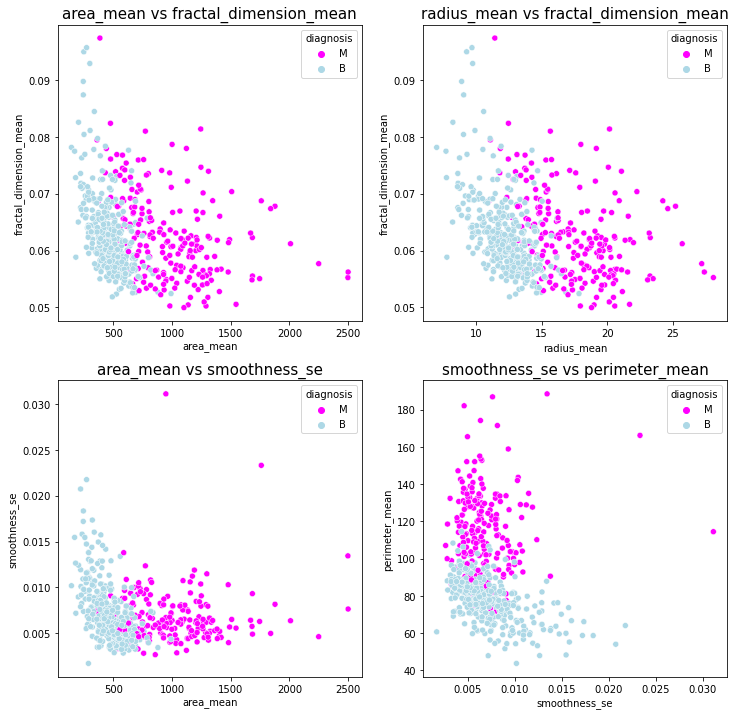

In [ ]:
fig = plt.figure(figsize=(12,12))
plot_scatter('area_mean','fractal_dimension_mean',221)
plot_scatter('radius_mean','fractal_dimension_mean',222)
plot_scatter('area_mean','smoothness_se',223)
plot_scatter('smoothness_se','perimeter_mean',224)

**Data Visualisation**

**pair plot**

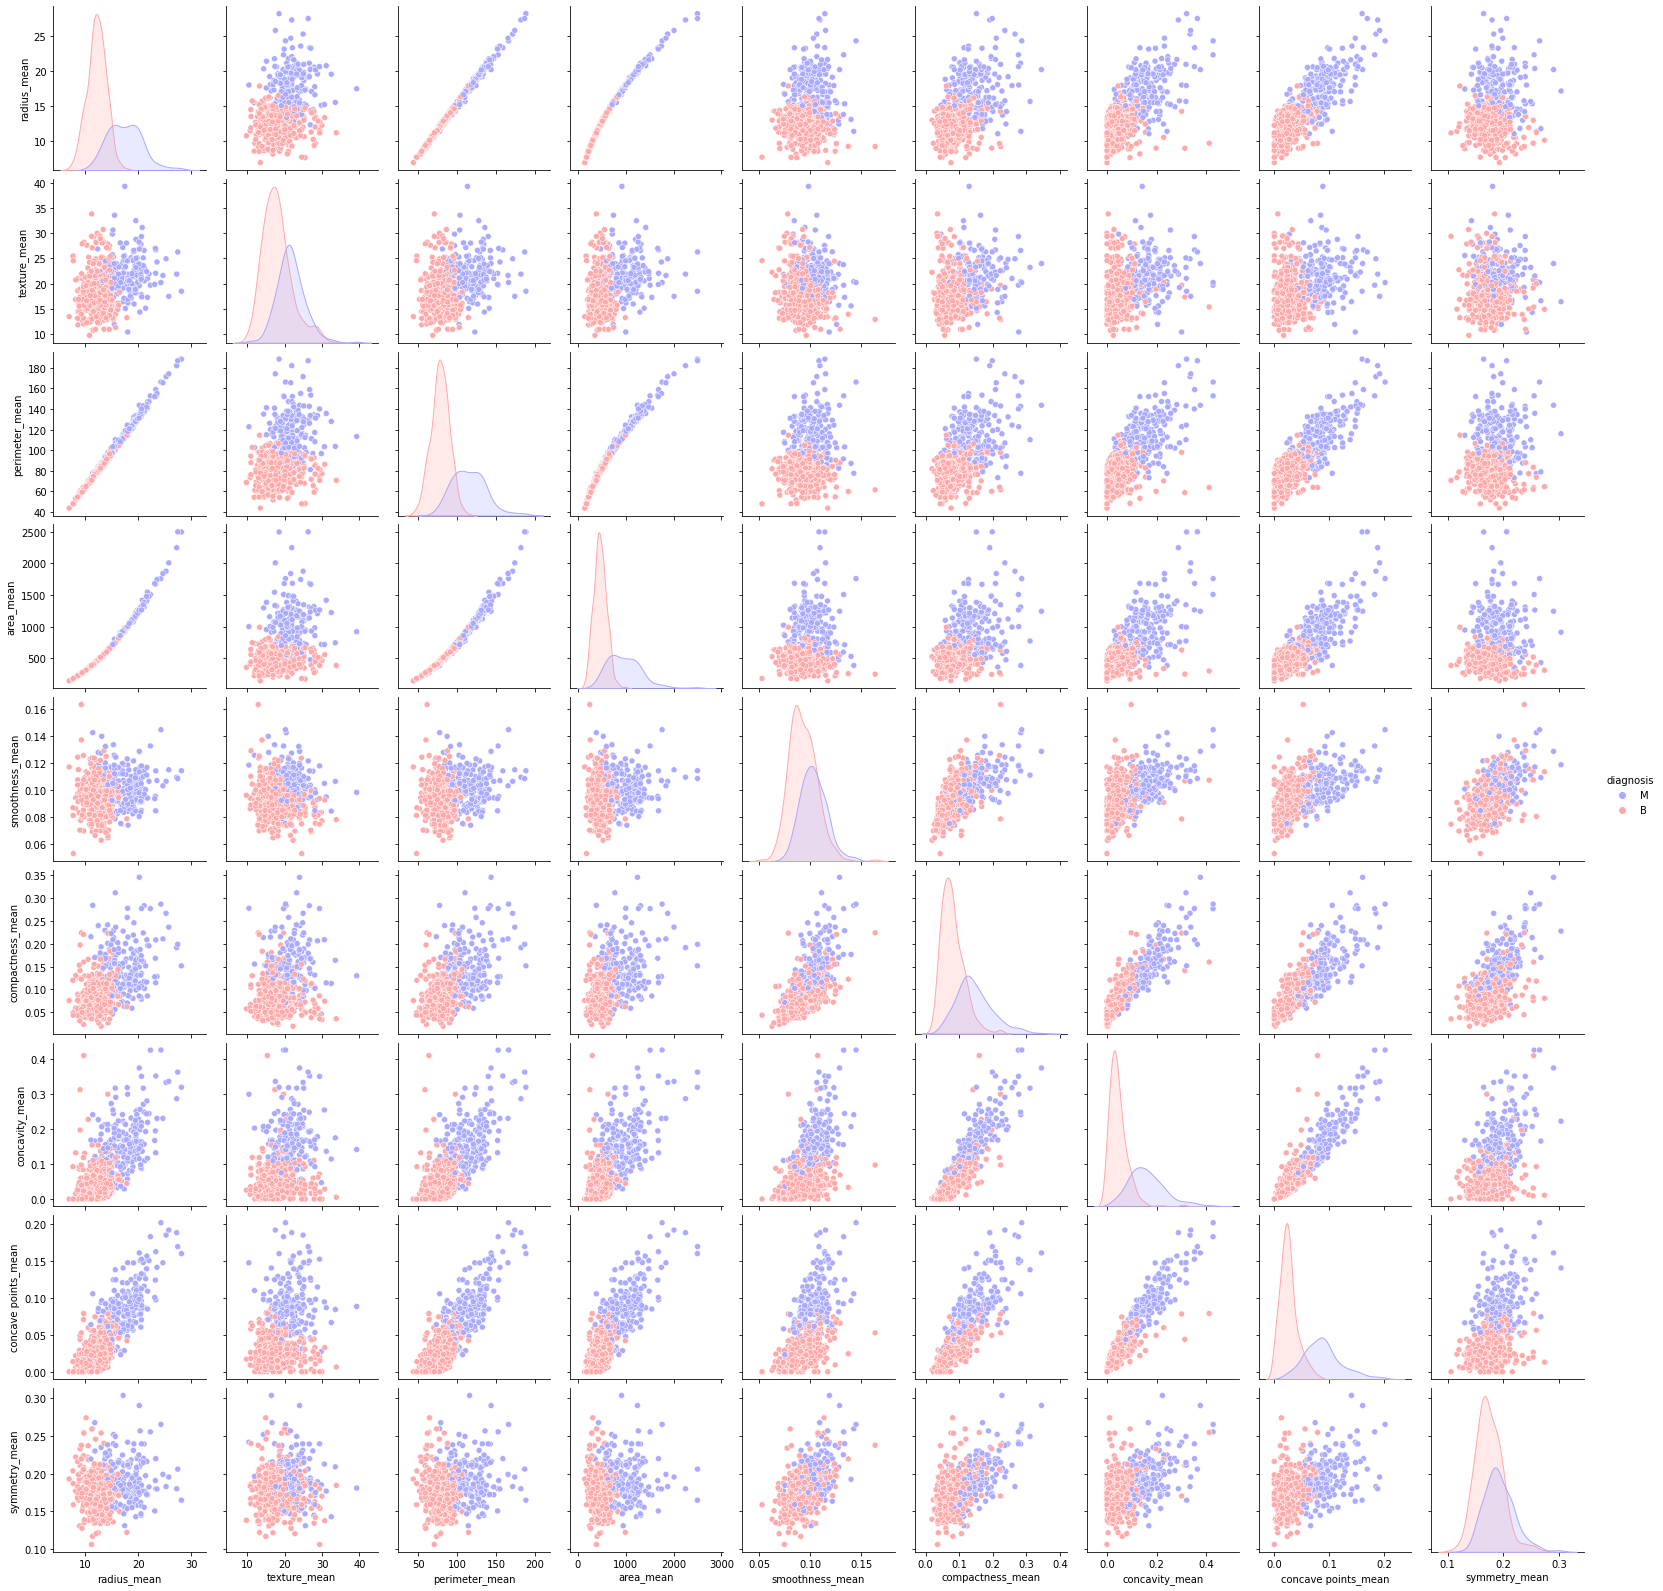

In [ ]:
from pylab import rcParams

rcParams['figure.figsize'] = 8,5

cols = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean',
 'compactness_mean','concavity_mean','concave points_mean','symmetry_mean','diagnosis']

sns_plot = sns.pairplot(data=df[cols],hue='diagnosis',palette ='bwr')
  

**Scatter Plot**

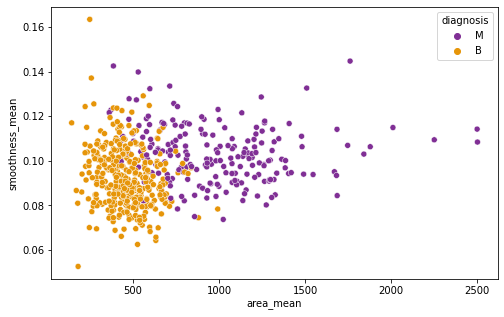

In [ ]:
sns.scatterplot(x = 'area_mean', y = 'smoothness_mean', hue = 'diagnosis', data=df, palette='CMRmap')

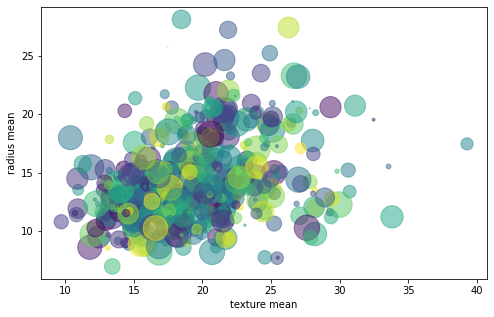

In [ ]:
size = len(df['texture_mean'])

area = np.pi *(15 * np.random.rand(size))**2
colors = np.random.rand(size)


plt.xlabel("texture mean")
plt.ylabel("radius mean")
plt.scatter(df['texture_mean'],df['radius_mean'], s=area, c= colors, alpha=0.5)

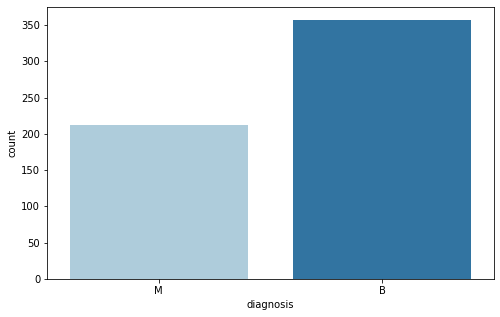

In [ ]:
sns.countplot(df['diagnosis'],palette='Paired')

**HISTOGRAM**

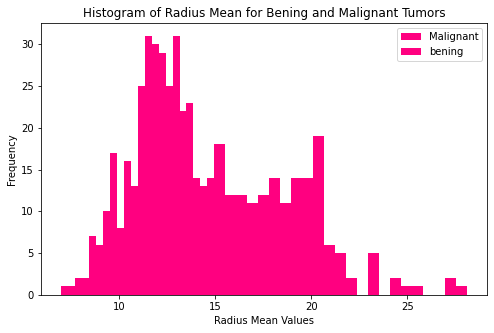

In [ ]:
m = plt.hist(df[df["diagnosis"]== "M"].radius_mean,bins=30, fc=(1,0,0.5),label = "Malignant")
b =plt.hist(df[df["diagnosis"]== "B"].radius_mean,bins=30, fc=(1,0,0.5),label="bening")

plt.legend()
plt.xlabel("Radius Mean Values")
plt.ylabel("Frequency")
plt.title("Histogram of Radius Mean for Bening and Malignant Tumors")
plt.show()

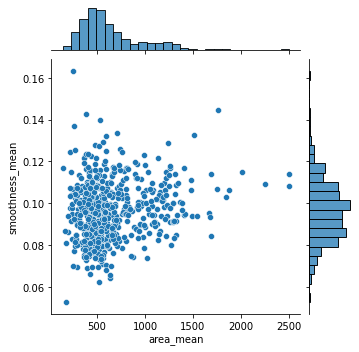

In [ ]:
sns.jointplot(data= df, x='area_mean',y='smoothness_mean',size=5)

**EDA**

In [ ]:
X = df.drop('diagnosis',axis=1).values
y = df['diagnosis'].values


In [ ]:
# Convert the M to 1 and B to 0
label = LabelEncoder()
y = label.fit_transform(y)
y[:20]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 20)

**Feature Scaling**

In [ ]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Modelling**

In [ ]:
#logistic Regression

logreg = LogisticRegression()

logreg.fit(X_train,y_train)
y_pred_logreg = logreg.predict(X_test)

In [ ]:
#Gradient Boosting Classifier
GB = GradientBoostingClassifier()
GB.fit(X_train, y_train)
y_pred_GB = GB.predict(X_test)

In [ ]:
#Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)


In [ ]:
#Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt=dt.predict(X_test)

In [ ]:
#KNeighbors Classsifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [ ]:
#XGB classifier

XGB = XGBClassifier()

XGB.fit(X_train, y_train)

y_pred_XGB = XGB.predict(X_test)

In [ ]:
#Support Vector Classifier
svc = SVC(probability=True)
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)

In [ ]:
from sklearn.svm import SVC
svc = SVC()

In [ ]:
svc.fit(X_train, y_train)

SVC()

In [ ]:
print('the  size of our training "X" (input features) s',X_train.shape)
print('\n')
print('the  size of our testing "X" (input features) s',X_test.shape)
print('\n')
print('the  size of our training "y" (input features) s',y_train.shape)
print('\n')
print('the  size of our testing "y" (input features) s',y_test.shape)
print('\n')

the  size of our training "X" (input features) s (455, 30)


the  size of our testing "X" (input features) s (114, 30)


the  size of our training "y" (input features) s (455,)


the  size of our testing "y" (input features) s (114,)




**cross validation**

In [ ]:
# cross validation function
def tn(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)[0, 0]


def fp(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)[0, 1]


def fn(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)[1, 0]


def tp(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)[1, 1]


def acc(y_true, y_pred):
    return accuracy(y_true, y_pred)

**Tuning the Hyperparameter**

In [ ]:
# custom accuracy
def accuracy(y_true, y_pred):
    cnf_matrix = confusion_matrix(y_true, y_pred)
    N = sum(map(sum, cnf_matrix))
    tp = cnf_matrix[1, 1]
    tn = cnf_matrix[0, 0]
    return round((tp + tn) / N, 2)

In [ ]:
# cross validation purpose
scoring = {'accuracy': make_scorer(metrics.accuracy_score), 'prec': 'precision'}
scoring = {'tp': make_scorer(tp), 'tn': make_scorer(tn),
           'fp': make_scorer(fp), 'fn': make_scorer(fn),
           'acc': make_scorer(acc)}

def print_result(result):
    print("True Positive: ", result['test_tp'])
    print("True Negative: ", result['test_tn'])
    print("False Negative: ", result['test_fn'])
    print("False Positive: ", result['test_fp'])
    print("Accuracy: ", result['test_acc'])

# acc list and rcc list stores the output of each model
acc = []
roc = []

In [ ]:
# Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

ac = accuracy_score(y_test, y_pred)
acc.append(ac)
ac_train = accuracy_score(y_train, y_pred_train)
rc = roc_auc_score(y_test, y_pred)
roc.append(rc)
print("Naive Bayes : ")
print("Training Set Accuracy : ", ac_train)
print("Test Set Accuracy {0} ROC {1}".format(ac, rc))

# cross validation
result = cross_validate(model, X_train, y_train, scoring=scoring, cv=10)
print_result(result)

Naive Bayes : 
Training Set Accuracy :  0.9318681318681319
Test Set Accuracy 0.956140350877193 ROC 0.9507575757575757
True Positive:  [15 15 17 16 12 13 14 12 14 15]
True Negative:  [28 28 28 29 27 29 29 27 28 28]
False Negative:  [1 2 0 1 5 3 2 4 2 1]
False Positive:  [2 1 1 0 2 0 0 2 1 1]
Accuracy:  [0.93 0.93 0.98 0.98 0.85 0.93 0.96 0.87 0.93 0.96]


In [ ]:
# Logistic Regression
LR = LogisticRegression()
LR.fit(X_train, y_train)
LR.score(X_train, y_train)
y_pred = LR.predict(X_test)
y_pred_train = model.predict(X_train)
# find accuracy
ac = accuracy_score(y_test, y_pred)
acc.append(ac)
ac_train = accuracy_score(y_train, y_pred_train)
# Code for ROC_AUC curve
rc = roc_auc_score(y_test, y_pred)
roc.append(rc)
print("****************************************************")
print("Logistic Regression : ")
print("Training Set Accuracy : ", ac_train)
print("Test Set Accuracy {0} ROC {1}".format(ac, rc))
# cross validation shows how accurate our model is
result = cross_validate(LR, X_train, y_train, scoring=scoring, cv=10)
print_result(result)

****************************************************
Logistic Regression : 
Training Set Accuracy :  0.9318681318681319
Test Set Accuracy 0.9298245614035088 ROC 0.925189393939394
True Positive:  [15 17 14 17 13 13 16 13 14 16]
True Negative:  [29 27 27 29 28 27 29 28 28 28]
False Negative:  [1 0 3 0 4 3 0 3 2 0]
False Positive:  [1 2 2 0 1 2 0 1 1 1]
Accuracy:  [0.96 0.96 0.89 1.   0.89 0.89 1.   0.91 0.93 0.98]


In [ ]:
# KNN
model = KNeighborsClassifier(n_neighbors=9, n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

ac = accuracy_score(y_test, y_pred)
acc.append(ac)
ac_train = accuracy_score(y_train, y_pred_train)
rc = roc_auc_score(y_test, y_pred)
roc.append(rc)
print("****************************************************")
print("K-Nearest Neighbors : ")
print("Training Set Accuracy : ", ac_train)
print("Accuracy {0} ROC {1}".format(ac, rc))
# cross validation
result = cross_validate(model, X_train, y_train, scoring=scoring, cv=10)
print_result(result)

****************************************************
K-Nearest Neighbors : 
Training Set Accuracy :  0.9384615384615385
Accuracy 0.9473684210526315 ROC 0.9403409090909092
True Positive:  [14 17 14 15 15 13 16 12 14 15]
True Negative:  [27 28 27 28 28 27 29 28 29 29]
False Negative:  [2 0 3 2 2 3 0 4 2 1]
False Positive:  [3 1 2 1 1 2 0 1 0 0]
Accuracy:  [0.89 0.98 0.89 0.93 0.93 0.89 1.   0.89 0.96 0.98]


In [ ]:
# Random Forest
model = RandomForestClassifier(n_estimators=20, max_depth=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

ac = accuracy_score(y_test, y_pred)
acc.append(ac)
ac_train = accuracy_score(y_train, y_pred_train)
rc = roc_auc_score(y_test, y_pred)
roc.append(rc)
print("****************************************************")
print("Random Forest : ")
print("Training Set Accuracy : ", ac_train)
print("Accuracy {0} ROC {1}".format(ac, rc))
# cross validation
result = cross_validate(model, X_train, y_train, scoring=scoring, cv=10)
print_result(result)

****************************************************
Random Forest : 
Training Set Accuracy :  0.9978021978021978
Accuracy 0.9824561403508771 ROC 0.9791666666666667
True Positive:  [16 17 16 16 16 14 15 11 16 15]
True Negative:  [27 29 28 29 27 27 28 29 29 28]
False Negative:  [0 0 1 1 1 2 1 5 0 1]
False Positive:  [3 0 1 0 2 2 1 0 0 1]
Accuracy:  [0.93 1.   0.96 0.98 0.93 0.91 0.96 0.89 1.   0.96]


In [ ]:
# Support Vector Machine
model = SVC(gamma='auto', kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

ac = accuracy_score(y_test, y_pred)
acc.append(ac)
ac_train = accuracy_score(y_train, y_pred_train)
rc = roc_auc_score(y_test, y_pred)
roc.append(rc)
print("****************************************************")
print("Support Vector Machine : ")
print("Training Set Accuracy : ", ac_train)
print("Test Set Accuracy {0} ROC {1}".format(ac, rc))
# cross validation
result = cross_validate(model, X_train, y_train, scoring=scoring, cv=10)
print_result(result)

****************************************************
Support Vector Machine : 
Training Set Accuracy :  0.967032967032967
Test Set Accuracy 0.956140350877193 ROC 0.9535984848484849
True Positive:  [15 16 15 15 14 13 16 12 15 16]
True Negative:  [29 28 28 28 28 29 29 29 28 28]
False Negative:  [1 1 2 2 3 3 0 4 1 0]
False Positive:  [1 1 1 1 1 0 0 0 1 1]
Accuracy:  [0.96 0.96 0.93 0.93 0.91 0.93 1.   0.91 0.96 0.98]


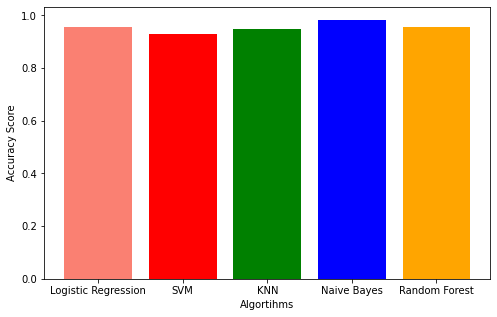

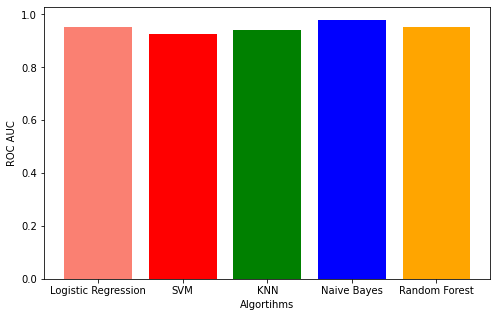

In [ ]:
# Plot the bar graph for accuracy and  roc-auc

# accuracy score
plt.figure(figsize=(8, 5))
plt.bar(['Logistic Regression', 'SVM', 'KNN', 'Naive Bayes', 'Random Forest'], acc,
        color=['salmon', 'r', 'g', 'b', 'orange'], label='Accuracy')
plt.ylabel('Accuracy Score')
plt.xlabel('Algortihms')

# roc-auc
plt.figure(figsize=(8, 5))
plt.bar(['Logistic Regression', 'SVM', 'KNN', 'Naive Bayes', 'Random Forest'], roc,
        color=['salmon', 'r', 'g', 'b', 'orange'], label='ROC AUC')
plt.ylabel('ROC AUC')
plt.xlabel('Algortihms')
plt.show()